In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_sample=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train=df_train.drop(['Id'], axis=1)

In [6]:
nan_mask = df_train.isna()
nan_count_per_column = df_train.isna().sum()
# features_train=[]
# excluded_features_train=[]

print("Number of NaN values per column:")
for heading, item in zip(nan_mask, nan_count_per_column):

    if(item==0):
        print(heading, item)
#         features_train.append(heading)
    else:
        print(heading,item,"Discarded")
#         excluded_features_train.append(heading)
        

Number of NaN values per column:
MSSubClass 0
MSZoning 0
LotFrontage 259 Discarded
LotArea 0
Street 0
Alley 1369 Discarded
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872 Discarded
MasVnrArea 8 Discarded
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37 Discarded
BsmtCond 37 Discarded
BsmtExposure 38 Discarded
BsmtFinType1 37 Discarded
BsmtFinSF1 0
BsmtFinType2 38 Discarded
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1 Discarded
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690 Discarded
GarageType 81 Discarded
GarageYrBlt 81 Discarded
GarageFinish 81 Discarded
GarageCars 0
GarageArea 0
GarageQual 81 D

In [7]:
nan_mask = df_test.isna()
nan_count_per_column = df_test.isna().sum()
# features_test=[]
# excluded_features_test=[]

print("Number of NaN values per column:")
for heading, item in zip(nan_mask, nan_count_per_column):

    if(item==0):
        print(heading, item)
#         features_test.append(heading)
    else:
        print(heading,item,"Discarded")
#         excluded_features_test.append(heading)
        

Number of NaN values per column:
Id 0
MSSubClass 0
MSZoning 4 Discarded
LotFrontage 227 Discarded
LotArea 0
Street 0
Alley 1352 Discarded
LotShape 0
LandContour 0
Utilities 2 Discarded
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 1 Discarded
Exterior2nd 1 Discarded
MasVnrType 894 Discarded
MasVnrArea 15 Discarded
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 44 Discarded
BsmtCond 45 Discarded
BsmtExposure 44 Discarded
BsmtFinType1 42 Discarded
BsmtFinSF1 1 Discarded
BsmtFinType2 42 Discarded
BsmtFinSF2 1 Discarded
BsmtUnfSF 1 Discarded
TotalBsmtSF 1 Discarded
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 2 Discarded
BsmtHalfBath 2 Discarded
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 1 Discarded
TotRmsAbvGrd 0
Functional 2 Discarded
Fireplaces 0
FireplaceQu 730 Discarded


In [8]:
# included_features=np.union1d(features_train,features_test)
# excluded_features=np.union1d(excluded_features_train,excluded_features_test)
# print(excluded_features)
# intersection_array=np.intersect1d(included_features,excluded_features)
# print(intersection_array)
# included_features=np.setdiff1d(included_features,intersection_array)
# print(included_features)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
import seaborn as sns

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_19/1255858044.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


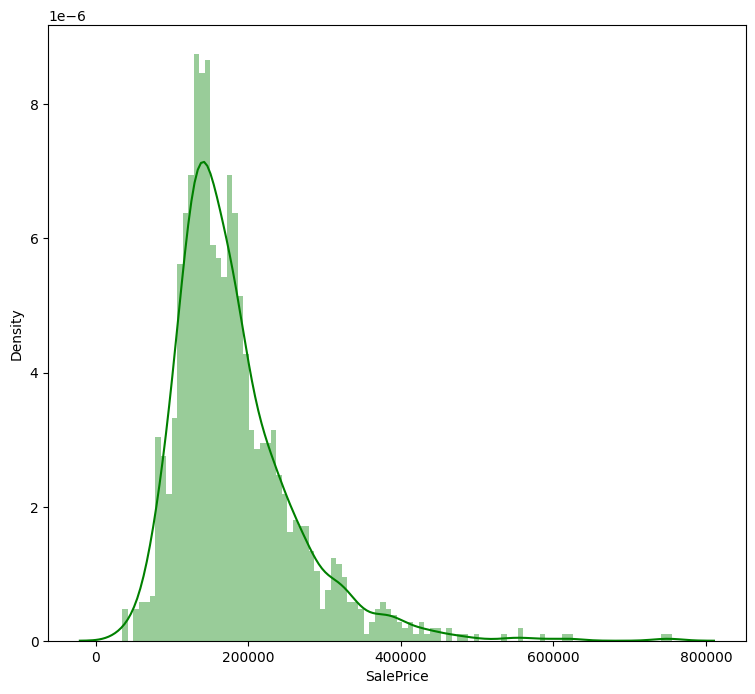

In [11]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [12]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [13]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

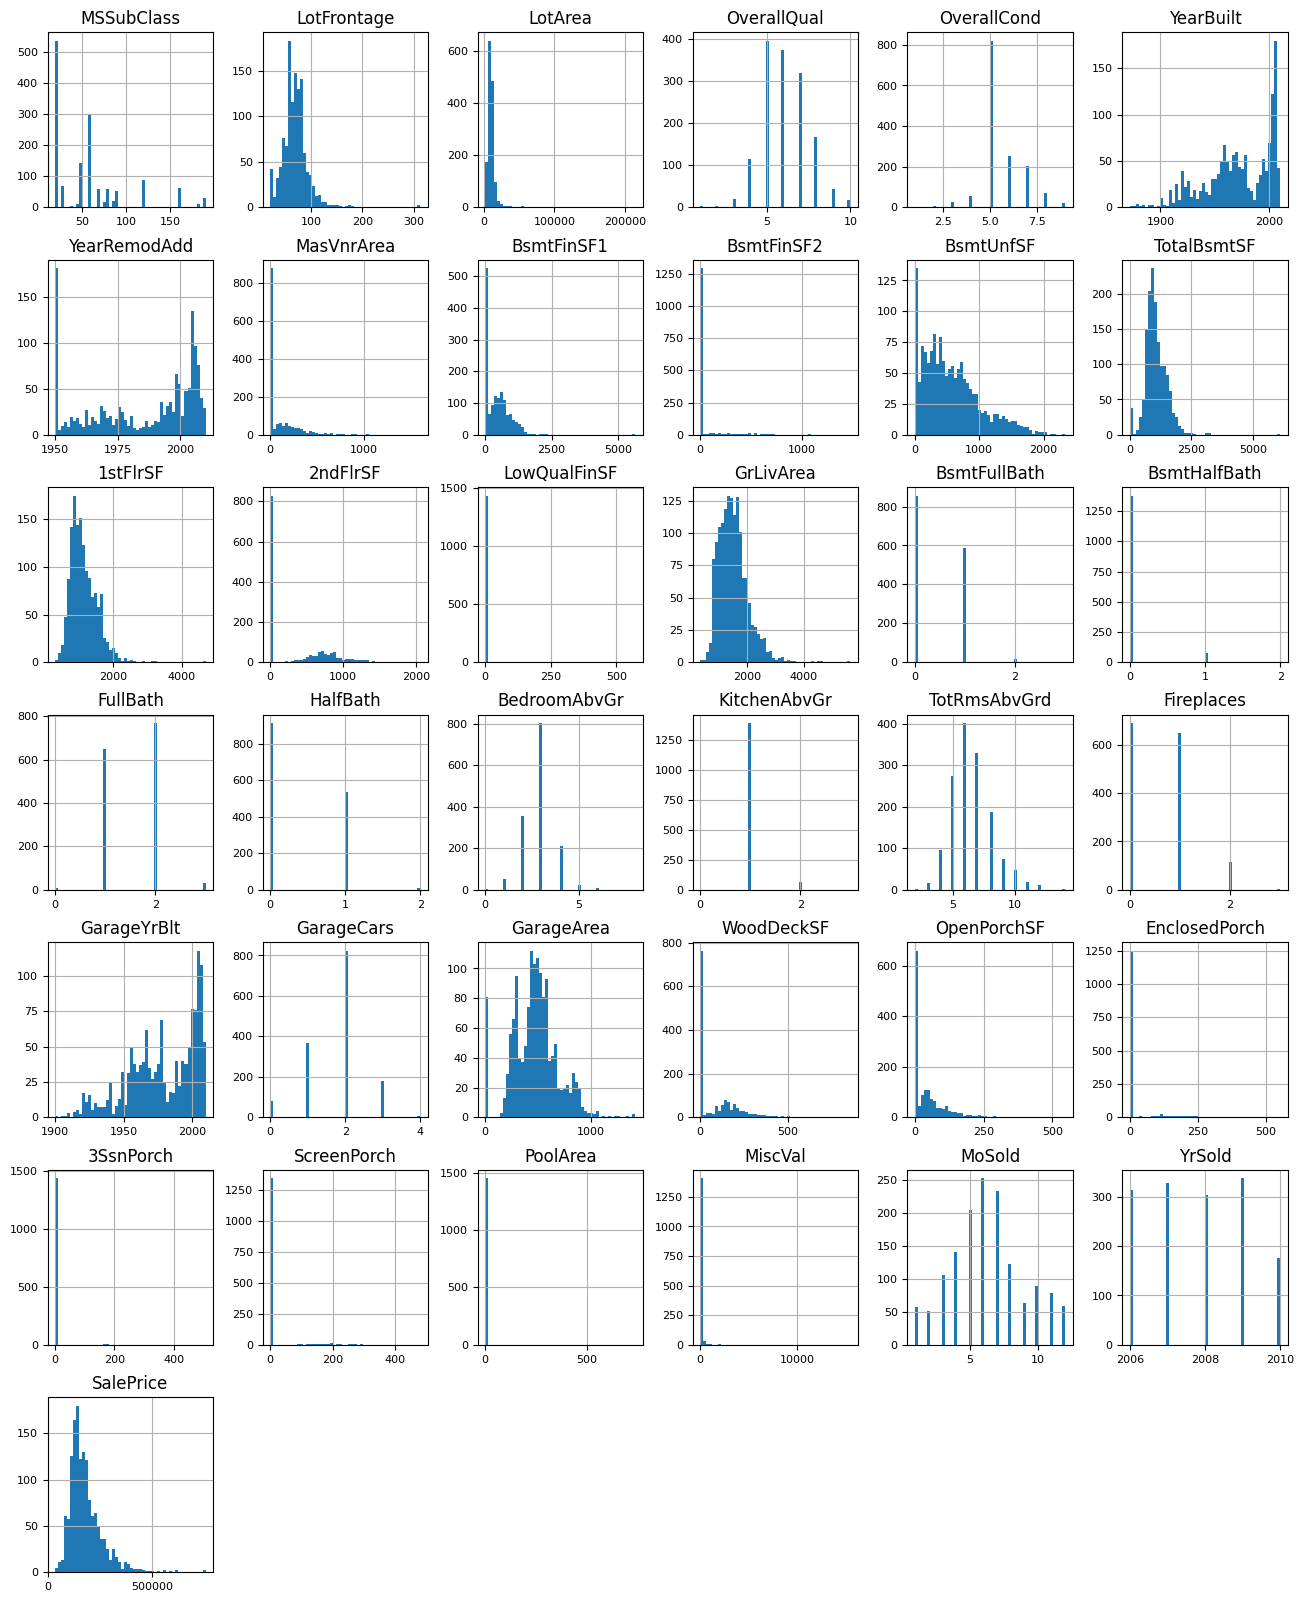

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [15]:
label='SalePrice'
tf_train=tfdf.keras.pd_dataframe_to_tf_dataset(df_num,label=label,task=tfdf.keras.Task.REGRESSION)


In [16]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [17]:
model = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
model.compile(metrics=["mse"])

Use /tmp/tmprfzdolnu as temporary training directory


In [18]:
model.fit(x=tf_train)

Reading training dataset...
Training dataset read in 0:00:07.694371. Found 1460 examples.
Training model...


[INFO 23-12-05 11:10:32.9087 UTC kernel.cc:1243] Loading model from path /tmp/tmprfzdolnu/model/ with prefix 2c7693fba2ea4052


Model trained in 0:00:02.083616
Compiling model...


[INFO 23-12-05 11:10:33.5117 UTC decision_forest.cc:660] Model loaded with 300 root(s), 138132 node(s), and 36 input feature(s).
[INFO 23-12-05 11:10:33.5118 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-12-05 11:10:33.5119 UTC kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [19]:
tfdf.model_plotter.plot_model_in_colab(model,tree_idx=0,max_depth=3)

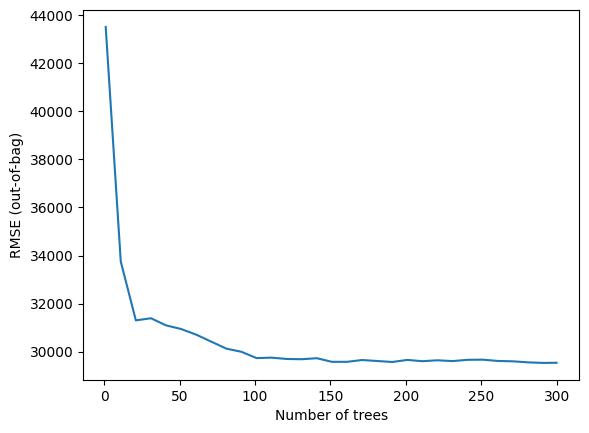

In [20]:
import matplotlib.pyplot as plt
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [21]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1460, accuracy=None, loss=None, rmse=29536.10557258533, ndcg=None, aucs=None, auuc=None, qini=None)

In [22]:
evaluation = model.evaluate(x=tf_train,return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

2/2 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - mse: 306524832.0000
loss: 0.0000
mse: 306524832.0000


In [23]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
    print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES


In [24]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #27), 112.0),
 ("GarageCars" (1; #13), 58.0),
 ("GrLivArea" (1; #15), 45.0),
 ("YearBuilt" (1; #33), 26.0),
 ("GarageArea" (1; #12), 18.0),
 ("TotalBsmtSF" (1; #31), 16.0),
 ("GarageYrBlt" (1; #14), 8.0),
 ("1stFlrSF" (1; #0), 7.0),
 ("FullBath" (1; #11), 7.0),
 ("Fireplaces" (1; #10), 2.0),
 ("YearRemodAdd" (1; #34), 1.0)]

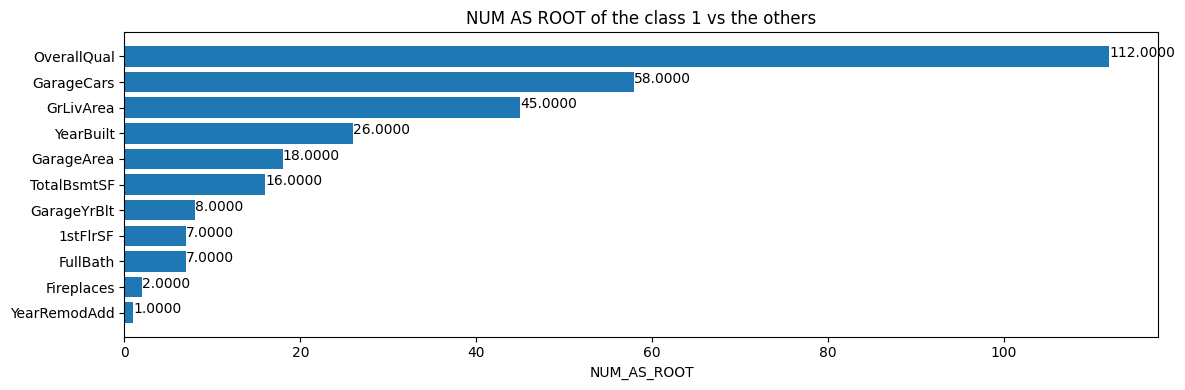

In [25]:
plt.figure(figsize=(12,4))

variable_importance_metric="NUM_AS_ROOT"
variable_importances=inspector.variable_importances()[variable_importance_metric]

feature_names=[vi[0].name for vi in variable_importances]
feature_importances=[vi[1] for vi in variable_importances]

feature_ranks=range(len(feature_names))

bar=plt.barh(feature_ranks,feature_importances,label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")
    
plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [26]:
df_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [27]:
ids=df_test.pop('Id')
tf_test=tfdf.keras.pd_dataframe_to_tf_dataset(df_test,task = tfdf.keras.Task.REGRESSION)

predictions = model.predict(tf_test)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': predictions.squeeze()})

output.head()

2/2 [==============================] - 1s 21ms/step


,Id,SalePrice
0,1461,128586.828125
1,1462,155480.187500
2,1463,180936.015625
3,1464,183467.671875
4,1465,194451.796875


In [28]:
df_sample['SalePrice']=model.predict(tf_test)
df_sample.to_csv('/kaggle/working/submission.csv', index=False)
df_sample.head()

2/2 [==============================] - 0s 21ms/step


,Id,SalePrice
0,1461,128586.828125
1,1462,155480.187500
2,1463,180936.015625
3,1464,183467.671875
4,1465,194451.796875
